In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras as keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from src.data import data_prep
from src.models import mlp_model, cnn_model, evaluate_model

In [30]:
X_train_mlp, X_test_mlp, X_train_cnn, X_test_cnn, y_train, y_test = data_prep(nivel_ruido=0.0)

#Conversão das labels
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

#Fixando seed
SEED = 42
np.random.seed(SEED)
keras.utils.set_random_seed(SEED)

In [ ]:
model_mlp = mlp_model()
model_mlp.summary()

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath='best_mlp_model.keras',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


epochs = 20
batch_size = 256
history_mlp = model_mlp.fit(X_train_mlp, y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            validation_split=0.2,
                            callbacks=[early_stopping, model_checkpoint])

with open('history_mlp.json', 'w') as f:
    json.dump(history_mlp.history, f)

C:\Users\pedro.neto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9033 - loss: 0.3288 - val_accuracy: 0.9597 - val_loss: 0.1328
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9624 - loss: 0.1256 - val_accuracy: 0.9701 - val_loss: 0.0990
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9741 - loss: 0.0840 - val_accuracy: 0.9735 - val_loss: 0.0896
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9807 - loss: 0.0627 - val_accuracy: 0.9762 - val_loss: 0.0834
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9852 - loss: 0.0485 - val_accuracy: 0.9758 - val_loss: 0.0843
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9875 - loss: 0.0399 - val_accuracy: 0.9778 - val_loss: 0.0837
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9891 - loss: 0.0337 - val_accuracy: 0.9785 - val_loss: 0.0800
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9901 - loss: 0.0292 - val_accu

In [32]:
# Avaliação do modelo
scores, acc = model_mlp.evaluate(X_test_mlp, y_test, verbose=0)
print('Test loss:', scores)
print('Test accuracy:', acc)

Test loss: 0.07447369396686554
Test accuracy: 0.979200005531311


In [ ]:
evaluate_model(model_mlp, X_test_mlp, y_test)

In [ ]:
#Teste de robustez do modelo
nivel = [0.0, 0.1, 0.3, 0.5]
resultados_mlp = {}

for nivel in nivel:

    _, X_test_mlp_noisy, _, _, _, _ = data_prep(nivel_ruido=nivel)
    loss, acc = model_mlp.evaluate(X_test_mlp_noisy, y_test, verbose=0)
    resultados_mlp[nivel] = {'loss': loss, 'accuracy': acc}
    print(f"Ruído {nivel}: Acurácia = {acc:.4f}, Perda = {loss:.4f}")

Ruído 0.0: Acurácia = 0.9792, Perda = 0.0745
Ruído 0.1: Acurácia = 0.9663, Perda = 0.1075
Ruído 0.3: Acurácia = 0.7378, Perda = 0.8462
Ruído 0.5: Acurácia = 0.5051, Perda = 2.2477


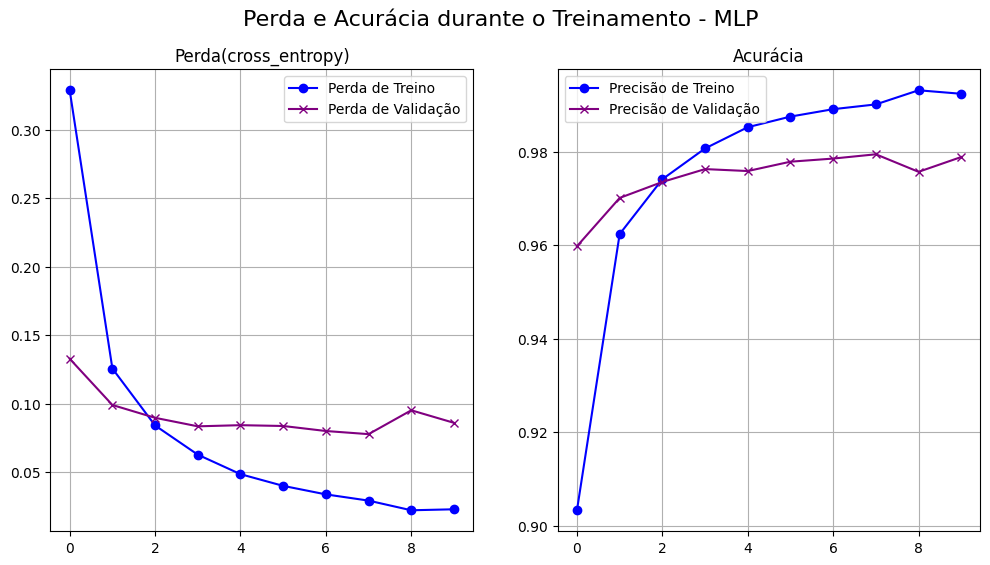

In [41]:
fig = plt.figure(figsize=(12, 6))
fig.suptitle(f'Perda e Acurácia durante o Treinamento - MLP', fontsize=16)
ax = fig.add_subplot(1, 2, 1)

#Grafico de perda
ax.plot(history_mlp.history["loss"],marker = 'o', color = 'blue', label="Perda de Treino")
ax.plot(history_mlp.history["val_loss"],marker = 'x', color = 'purple', label="Perda de Validação")
ax.legend()
ax.set_title('Perda(cross_entropy)')
ax.grid(True)


ax = fig.add_subplot(1, 2, 2)
ax.plot(history_mlp.history["accuracy"],marker = 'o', color = 'blue', label="Precisão de Treino")
ax.plot(history_mlp.history["val_accuracy"],marker = 'x', color = 'purple', label="Precisão de Validação")
ax.legend()
ax.set_title('Acurácia')
ax.grid(True)

plt.show()

#Exportar figura
fig.savefig('figures/mlp_loss_accuracy.png')